In [15]:
import pandas as pd
df= pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.drop(['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction'],inplace=True,axis=1)
df.head()

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1


In [17]:
X= df.drop(['Outcome'], axis=1)
Y= df['Outcome']
print(X)
print(Y)


     Age
0     50
1     31
2     32
3     21
4     33
..   ...
763   63
764   27
765   30
766   47
767   23

[768 rows x 1 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.20, random_state=0)


In [20]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [22]:
print(" Predicted Value")
y_pred= logreg.predict(x_test)
print(y_pred[:10])
print("Actual Value")
print(y_test[:10])

 Predicted Value
[0 0 0 1 0 0 0 1 0 1]
Actual Value
661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
Name: Outcome, dtype: int64


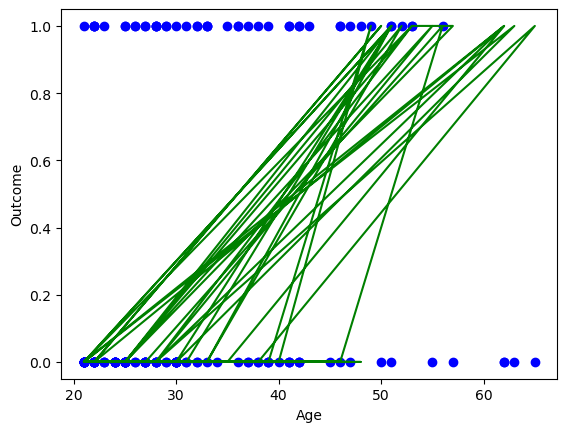

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color='b')
plt.plot(x_test, logreg.predict(x_test), color='g')
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.show()

Accuracy :  0.6883116883116883
Precison  :  0.6372854962783021
Recall Score :  0.6883116883116883
F1 Score :  0.6281484054890821
MCC :  0.11519005465595214


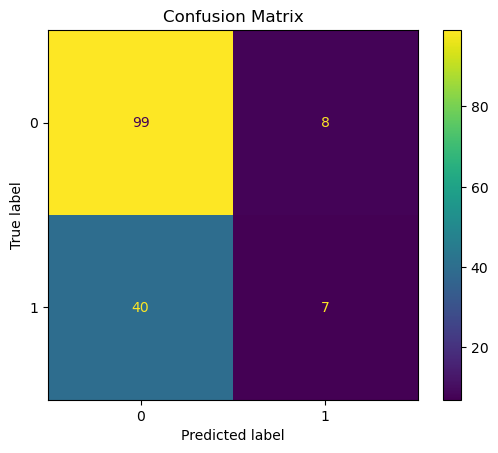

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy : ' , metrics.accuracy_score(y_test, y_pred))
print('Precison  : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()